# Task : Color identification of images


# **THE SPARKS FOUNDATION**

IoT & Computer Vision (GRIP June'21)

**Author: Shubh Patel** 

Task 2: Color Detection

# Importing useful libraries

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os



# Working with OpenCv

The type of this input is <class 'numpy.ndarray'>
Shape: (2666, 4000, 3)


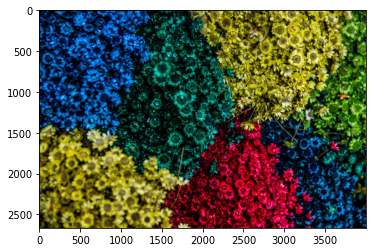

In [ ]:
image = cv2.imread('sample.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)
#Converting BGR color space to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Resizing images

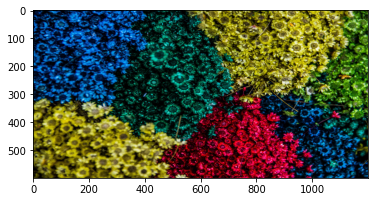

In [ ]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# RGB to Hex Conversion

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))



# Read image in RGB color space

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


# Get colors from an image

In [ ]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors


# Calling our functions

[array([66.59252965, 34.60289935, 10.70371783]),
 array([198.88724109, 199.58392709, 114.57241094]),
 array([ 6.1179441 , 15.49421181, 17.42992981]),
 array([ 5.53069728, 63.73997242, 82.68963967]),
 array([186.16353967,   7.96410105,  48.89666125]),
 array([  7.00243972, 118.6253827 , 177.69608687]),
 array([ 99.81476448, 106.67731274,  18.84321236]),
 array([167.05878971, 163.83225528,  27.35187581])]

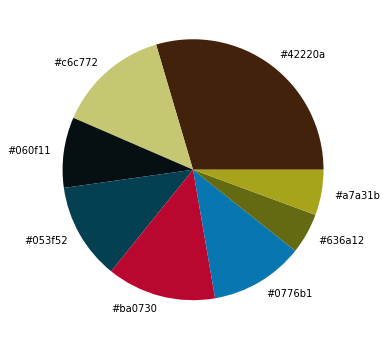

In [ ]:
get_colors(get_image('sample.jpg'), 8, True)

# The above pie chart showing types of  colors in image